$f(x) =x $, $x\in (-\pi,\pi)$ を例に， $S_n(x)$ をプロットするプログラムを書いていきましょう．

In [2]:
using Plots
using Pkg
Pkg.add("QuadGK")
using QuadGK # 以下で，quadgk（数値積分）を使うならばこのパッケージが必要

まず，$f(x)$を表す関数を定義します．

In [9]:
function func_original(x)
    return x
end

func_original (generic function with 1 method)

次に，$S_n(x)$を表す関数を定義します．

In [10]:
function S(n,a0,a,b,x)
    s = zeros(length(x),1)
    for l = 1: length(x)
        s[l] = a0/2;
        for k = 1:n
            s[l] +=  a[k]*cos(k*x[l]) + b[k]*sin(k*x[l])
        end
    end
    return s
end

S (generic function with 1 method)

In [11]:
n = 100; # この値は適当に変えて試してみてください．
a0 = 0; 
a = zeros(n,1);　# a_k用の配列
b = zeros(n,1); # b_k用の配列

$f(x)$ は奇関数ですから$a_k=0$であり，$b_k$のみ考えます．定義に従って計算すれば<br>
$\quad \displaystyle b_k = \frac{1}{\pi} \int_{-\pi}^\pi x \sin(kx) \, \mathrm d x  = \frac{2(-1)^{k+1}}{k}$ <br>
となります．<br>
このように直接計算できるときは，その結果を使うのがよいでしょう．もちろん，前回の内容を応用して数値積分することもできますが，領域を非常に細かく分割する必要があります．もっとも，もっとよい数値積分手法もあり，以下のfor文のコメントの部分はQuadGKというパッケージを使う場合の例になっています．<br>
https://github.com/JuliaMath/QuadGK.jl

In [12]:
for k = 1:n
    b[k] = 2*(-1)^(k+1)/k;
#     b[k], tmp = quadgk(x -> 1/pi * func_original(x) * sin(k*x), -pi, pi, rtol=1e-10)  # rtol　で数値積分の精度を設定
end

プロット用の変数を準備してプロットします．<br>
とりあえず，サンプルプログラムでは$n=1,2,10,50,100$のときをプロットしてみましたが，値を変えたり，あるいはプロットの数を増やしたりしていろいろ試してみてください．

In [13]:
x = -pi:pi/100:pi;

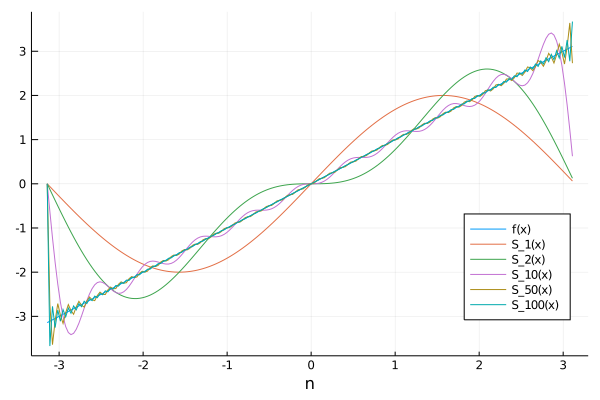

In [14]:
plot(x,func_original.(x),label="f(x)",legend=:bottomright)
plot!(x,S(1,a0,a,b,x),label="S_1(x)")
plot!(x,S(2,a0,a,b,x),label="S_2(x)")
plot!(x,S(10,a0,a,b,x),label="S_10(x)")
plot!(x,S(50,a0,a,b,x),label="S_50(x)")
plot!(x,S(100,a0,a,b,x),label="S_100(x)") 
xlabel!("n")

$n$を大きくすると$y=x$に近づいているような結果になりました．ただし，$x=-\pi,\pi$の付近では目で見てわかるくらいには振動が観察されます．

今週の課題です．以下のうち幾つかに取り組んでみてください．<br>
1.  誤差　$\displaystyle \text{err}(n) = \int_{-\pi}^\pi (f(x) - S_n(x) )^2 \,\mathrm dx$ は$n$を大きくすると$0$に収束することが期待されます．横軸を$n$として$\text{err}(n)$をプロットしてみましょう．（まず手計算により$\text{err}(n)$を$a_k$, $b_k$を用いて表しておくと便利です（もちろんこの計算は$f(x)$に依存します
）．） <br>
2.  $n$を大きくしたときに$\displaystyle \sup_{x\in (-\pi,\pi)}| f(x) - S_n(x)|$ は0に収束するか（すなわち一様収束するか）考えてみましょう．<br>
3.  $f(x)$ として他の関数も試してみましょう．$x^2$や$x^3$, $x+ x^2$のような多項式でもよいですし，不連続な関数（区分的に連続な関数：例えば$(-\pi,0)$ で$f(x) = -1$, $(0,\pi)$で$f(x)=1$（不連続点（この場合$x=0$）では$f(x)$をどのように設定しても$a_k$や$b_k$の値には影響しません）で試してみるのもよいでしょう．ただし，（区分的に）多項式でない関数を考える場合，$a_k$や$b_k$を求める積分の計算で，数値積分を使わざるをえなくなることもあります．